<a href="https://colab.research.google.com/github/naphtron/Phase-3-Project/blob/master/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Project

## Introduction

In this notebook, we embark on a project to build a predictive model aimed at forecasting whether Telco customers will churn or not.

Churn, in this context, refers to customers terminating their association with the telecommunications service provider.

The primary objective of this project is to develop an effective model capable of anticipating customer churn. This proactive approach will enable the company to implement measures to retain customers and, consequently, reduce the overall churn rate.

### Additional Objective

1. **Identify High Churn Risk Segments:**
   - Analyze churn rates across different demographic and service-related segments in the dataset. This provides a solid foundation for understanding which customer groups are more prone to churning.

2. **Optimize Service Offerings:**
   - Explore the impact of different services on churn. This analysis can offer insights into which services are correlated with higher or lower churn rates.

3. **Enhance Loyalty Programs:**
   - Explore the relationship between customer loyalty (measured by tenure) and churn. This exploration can inform strategies for improving loyalty programs and retaining long-term customers.



# Data Description

# Telco Customer Churn DataFrame

The provided data represents information about Telco customers and includes 7043 entries with 21 columns. The DataFrame has a `RangeIndex` with entries ranging from 0 to 7042.

## Data Columns

| Column            | Description                                        |
|-------------------|----------------------------------------------------|
| customerID        | Unique identifier for each customer.               |
| gender            | Gender of the customer (e.g., Male or Female).     |
| SeniorCitizen     | Binary indicator for senior citizen status (1 or 0).|
| Partner           | Whether the customer has a partner (Yes or No).    |
| Dependents        | Whether the customer has dependents (Yes or No).  |
| tenure            | Number of months the customer has been with the company.|
| PhoneService      | Whether the customer has phone service (Yes or No).|
| MultipleLines     | Whether the customer has multiple lines (Yes, No, or No phone service).|
| InternetService   | Type of internet service (DSL, Fiber optic, or No).|
| OnlineSecurity    | Availability of online security (Yes, No, or No internet service).|
| OnlineBackup      | Availability of online backup (Yes, No, or No internet service).|
| DeviceProtection  | Availability of device protection (Yes, No, or No internet service).|
| TechSupport       | Availability of tech support (Yes, No, or No internet service).|
| StreamingTV       | Availability of streaming TV (Yes, No, or No internet service).|
| StreamingMovies   | Availability of streaming movies (Yes, No, or No internet service).|
| Contract          | Type of customer contract (Month-to-month, One year, Two years).|
| PaperlessBilling  | Whether the customer uses paperless billing (Yes or No).|
| PaymentMethod     | The customer's payment method.                     |
| MonthlyCharges    | Monthly amount charged to the customer (in dollars).|
| TotalCharges      | Total amount charged to the customer.               |
| Churn             | Customer churn status (Yes or No).                 |


## Notebook Structure

1. **Dataset Description:** Formal documentation describing the structure and content of the Telco Customer Churn dataset.

2. **Import Libraries:** Importing necessary libraries, such as Pandas for data manipulation and analysis.

3. **Load Dataset:** Reading the dataset into a Pandas DataFrame for further analysis.

4. **Data Preparation:** Cleaning and preprocessing the data for model input.

5. **Exploratory Data Analysis (EDA):** Exploring the cleaned dataset to gain insights into its characteristics.

6. **Modeling:** Developing and training the predictive model.

7. **Model Evaluation:** Assessing the performance of the trained model.

8. **Conclusion:** Summarizing the findings and outlining potential next steps.

In [80]:
# Import necessary libraries

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# config settings
sns.set_theme(style='darkgrid')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

In [81]:
#### OOP
##
# class DataSource:
#     def __init__(self, file_path):
#         self.file_path = file_path
#         self.data = None
#         self.file_extension_mapping = {
#             'csv': 'read_csv',
#             'xlsx': 'read_excel',
#             'json': 'read_json',
#             # More file extensions and corresponding Pandas methods will be addes as needed 😁
#         }

#     def load_data(self):
#         try:
#             # Extract the file extension from the file path
#             file_extension = self.file_path.split('.')[-1].lower()

#             # Choose the appropriate Pandas method based on the file extension
#             pandas_method = self.file_extension_mapping.get(file_extension)

#             if pandas_method:
#                 # Call the chosen Pandas method to load the data
#                 load_method = getattr(pd, pandas_method)
#                 self.data = load_method(self.file_path)
#                 print(f"Data loaded successfully from {self.file_path}")
#                 return self.data
#             else:
#                 print(f"Error: Unsupported file extension '{file_extension}'")
#         except FileNotFoundError:
#             print(f"Error: File not found at {self.file_path}")
#         except Exception as e:
#             print(f"An error occurred: {e}")

#     def display_data_info(self):
#         if self.data is not None:
#             # Display basic information about the loaded data
#             print("\nData Information:")
#             print(self.data.info())
#         else:
#             print("Error: No data loaded. Use 'load_data()' method first.")

#     def display_data_head(self, n=5):
#         if self.data is not None:
#             # Display the first n rows of the loaded data
#             print("\nData Preview:")
#             print(self.data.head(n))
#         else:
#             print("Error: No data loaded. Use 'load_data()' method first.")

# # Example Usage:
# # Instantiate the DataSource class with the file path
# data = DataSource('Telco-Customer-Churn.csv')
# data.load_data()
# data.display_data_info()

In [82]:

# Read the CSV file 'Telco-Customer-Churn.csv' into a DataFrame named df
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the DataFrame to get an overview
display(df.head())
#Display shape
print("\n Shape of the DataFrame")
print(df.shape,"\n")
print("\n Info")
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



 Shape of the DataFrame
(7043, 21) 


 Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 1

In [83]:
print("Number of categorical columns ",len(df.select_dtypes(['object']).columns))
print("Number of numeric columns: ", len(df.select_dtypes(['float','int']).columns))

Number of categorical columns  18
Number of numeric columns:  3


In [84]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values present.

Next, check for duplicate records

In [85]:
df.duplicated().sum()

0

The dataset contains no duplicates

In [86]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [87]:
unique_values = df.apply(lambda x: x.unique())
unique_values

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

Total Charges should be a numeric column

In [88]:
# Convert total charges to numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [89]:
df[df['TotalCharges'].isna() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<Axes: ylabel='Frequency'>

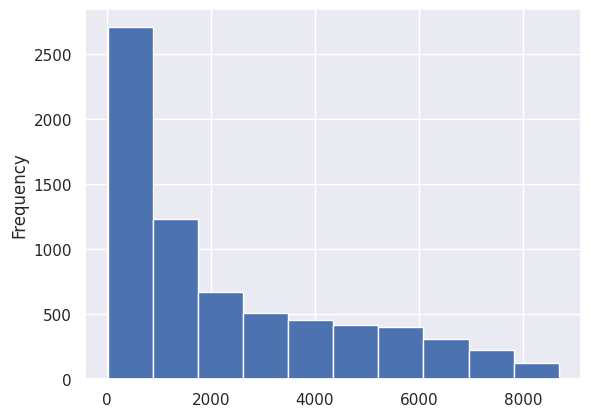

In [90]:
df.TotalCharges.plot(kind='hist')

In [91]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [92]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check Distribution of Churn Column

<Axes: xlabel='Churn', ylabel='count'>

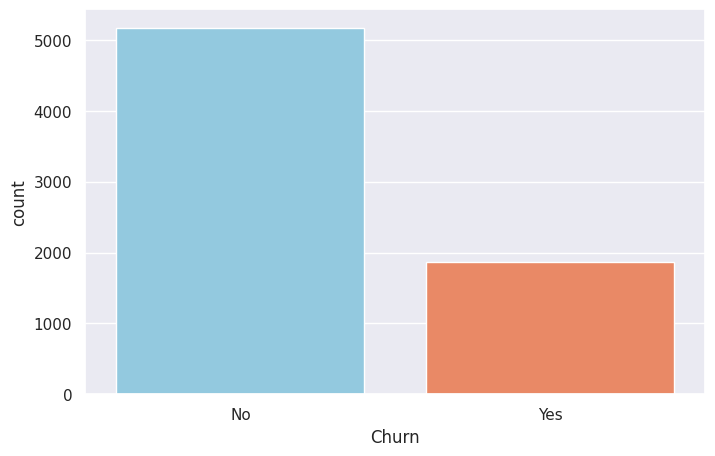

In [94]:
fig, ax = plt.subplots(figsize=(8,5))

palette = {'Yes': 'coral', 'No': 'skyblue'}

sns.countplot(
              data=df,
              x='Churn',
              palette=palette
)

### Explore Different Demographic Segments
- Find out how they relate with churn

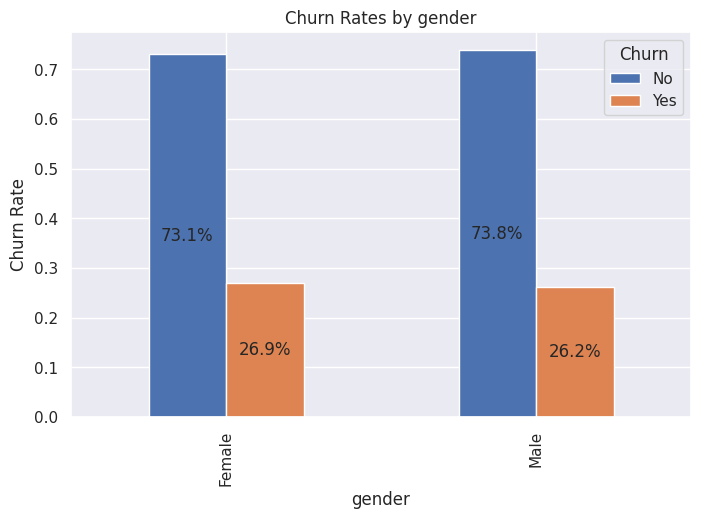

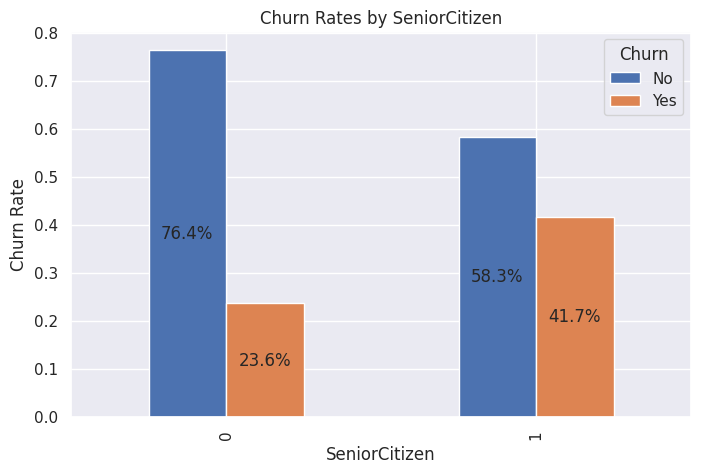

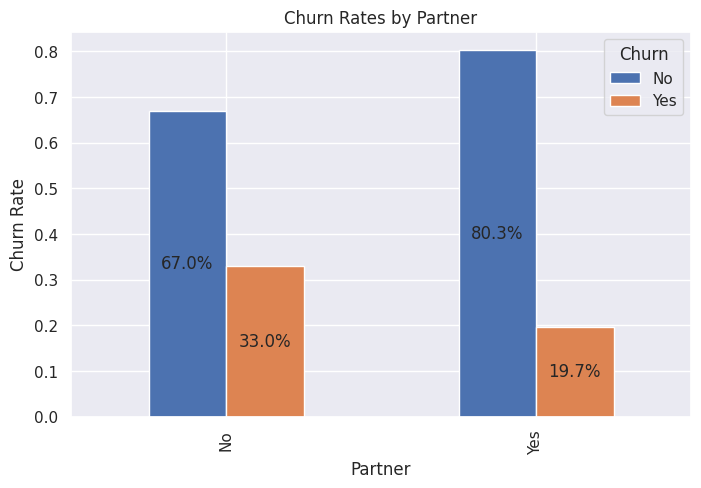

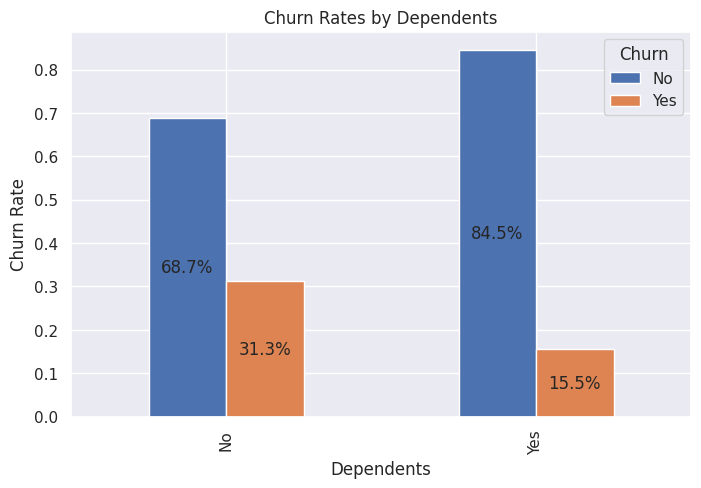

In [95]:
for i in ['gender','SeniorCitizen','Partner','Dependents']:
  demographic_churn = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()

  # Visualize churn rates by gender with percentage labels
  ax = demographic_churn.plot(kind='bar', stacked=False, figsize=(8, 5), title=f'Churn Rates by {i}')
  plt.xlabel(f'{i}')
  plt.ylabel('Churn Rate')

  # Display percentage labels on each bar
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

  plt.show()


**Gender**

Churn Rate for Males: 26.9%
Churn Rate for Females: 26.2%

Observation: The churn rates for males and females are relatively close, suggesting that gender alone may not be a strong predictor of churn.

**Senior Citizen**

Churn Rate for Non-Senior Citizens (0): 23.6%
Churn Rate for Senior Citizens (1): 41.7%

Observation: There is a notable difference in churn rates between senior and non-senior citizens. Senior citizens have a higher churn rate, indicating that being a senior citizen may be a relevant factor in predicting churn.

**Partner**

Churn Rate for No Partner (0): 33%
Churn Rate for Partner (1): 19.7%

Observation: Customers without a partner have a higher churn rate compared to those with a partner. Having a partner appears to be associated with lower churn.


**Dependents**

Churn Rate for No Dependents (0): 31.3%
Churn Rate for Dependents (1): 15.5%

Observation: Customers without dependents have a higher churn rate compared to those with dependents. Having dependents appears to be associated with lower churn.

In [96]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2151,2560-WBWXF,Male,0,No,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.15,1498.85,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
3706,4993-JCRGJ,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,84.30,2281.60,No
454,4785-FCIFB,Female,0,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.40,1417.90,No


##### Tenure Group vs Churn
- Creating **tenure_group** to categorize customers based on their tenure, facilitating analysis of churn patterns by tenure.

In [97]:
bins = [0, 12, 24, 36, 48, 60, np.inf]
labels = ['0-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '60+ months']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

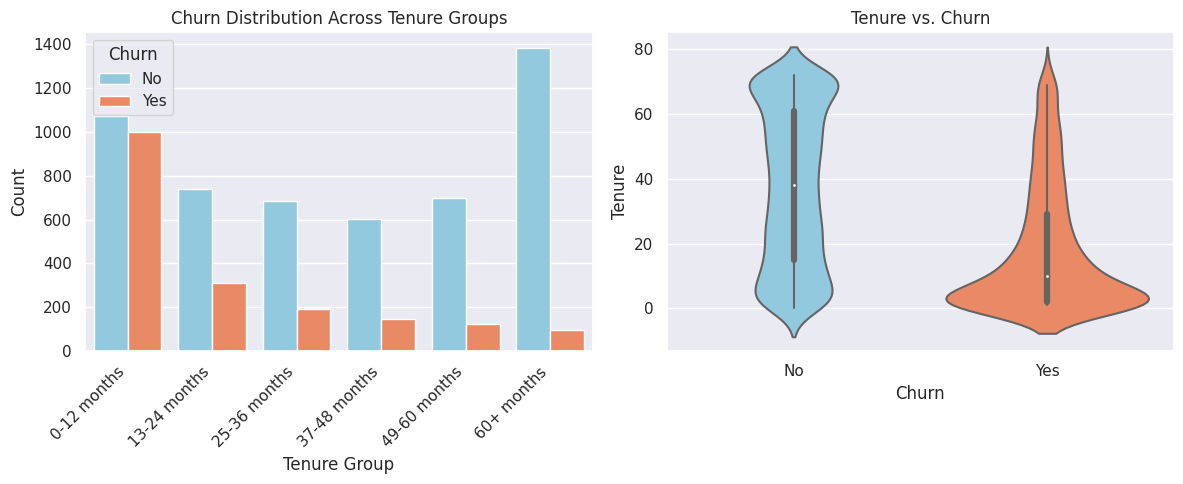

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))

sns.countplot(x='tenure_group', hue='Churn', data=df, ax=ax1, palette=palette)
ax1.set_xlabel('Tenure Group')
ax1.set_ylabel('Count')
ax1.set_title('Churn Distribution Across Tenure Groups')

sns.violinplot(x='Churn', y='tenure', data=df, ax=ax2, palette = palette)
ax2.set_xlabel('Churn')
ax2.set_ylabel('Tenure')
ax2.set_title('Tenure vs. Churn')

# Rotate x-axis labels for better readability in the countplot
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


From a visual examination of the count plot, it's evident that the "60+ months" tenure group exhibits the highest retention rate, whereas the "0-12 months" tenure group displays the highest churn rate. Additionally, the violin plot further highlights that customers who churned tend to have lower tenure compared to retained customers.

To address the observed issue of high churn rates:

- Implement targeted retention strategies for customers in the lowest tenure group (0-12 months), focusing on personalized onboarding, proactive customer support, and incentive programs to increase engagement and satisfaction.

- Additionally, maintain efforts to enhance customer loyalty for those in the highest tenure group (60+ months) through exclusive offers, loyalty programs, and continuous communication to reinforce their long-term commitment.

#### Churn vs Contract

In [99]:
#check for unique values
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='Count', ylabel='Contract'>

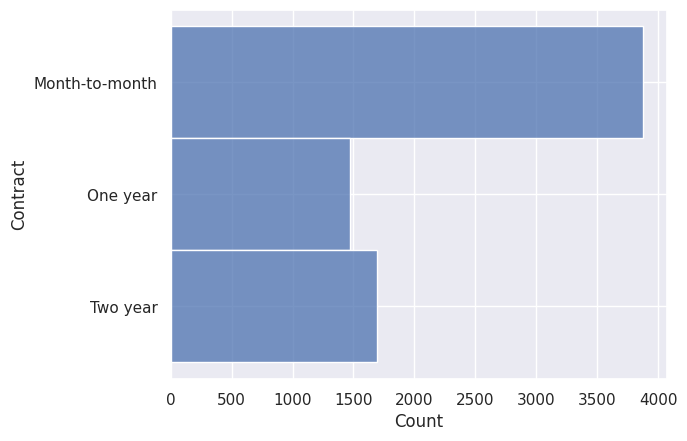

In [100]:
sns.histplot(y='Contract', data=df)

The visual exhibits that Month-to-month contracts were the most common

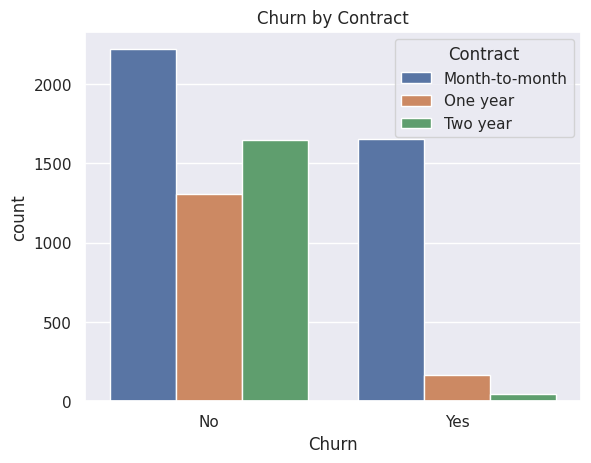

In [101]:
plot = sns.countplot(x='Churn',data=df,hue='Contract')
plot.set_title("Churn by Contract")
plt.show()

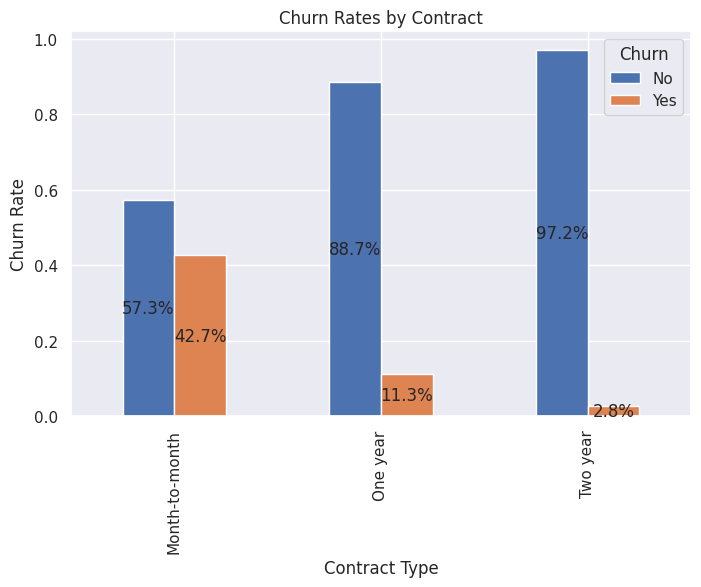

In [102]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Visualize churn rates by gender with percentage labels
ax = contract_churn.plot(kind='bar', stacked=False, figsize=(8, 5), title=f'Churn Rates by Contract')
plt.xlabel(f'Contract Type')
plt.ylabel('Churn Rate')

# Display percentage labels on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

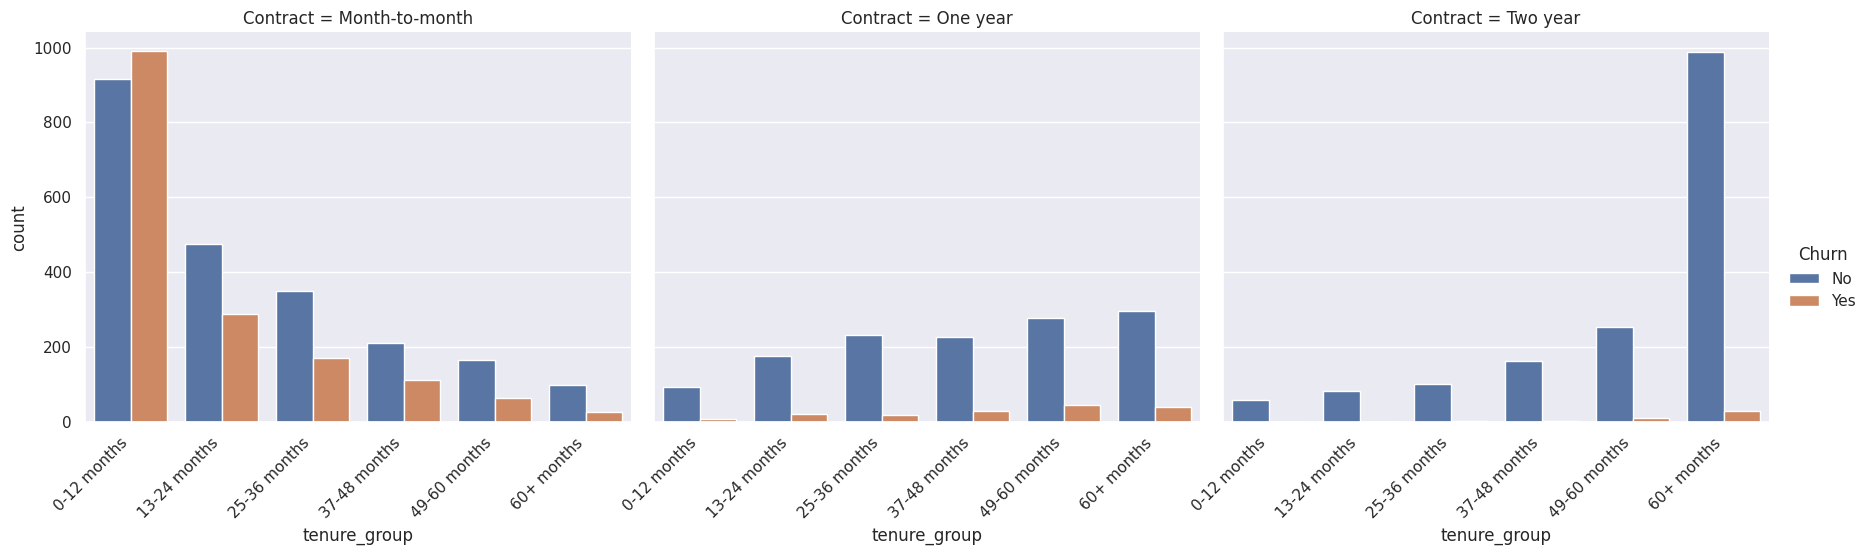

In [103]:
g = sns.catplot(data=df, x='tenure_group', hue='Churn', col='Contract', kind='count', height=5, aspect=1.2)

# Rotate x-axis tick labels for all subplots
g.set_xticklabels(rotation=45, ha='right')

plt.show()

Clients opting for month-to-month contracts demonstrated the highest churn rate and the lowest retention rate. Conversely, individuals committing to one and two-year contracts exhibited notably elevated retention rates (88.7% and 97.2%, respectively) accompanied by lower churn rates (11.3% and 2.8%, respectively). This pattern underscores the inverse relationship between contract duration and churn rate, emphasizing the wisdom of offering incentives to encourage short-term contract holders to transition to longer-term commitments.

#### Churn vs Charges (Monthly and Total Charges)

In [104]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

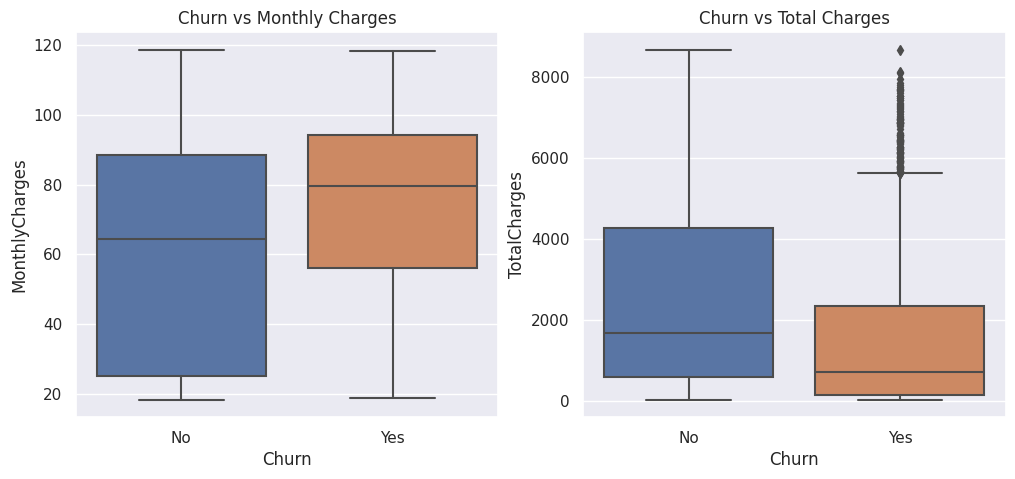

In [105]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12, 5))


boxplot = sns.boxplot(x='Churn',y='MonthlyCharges',data=df,ax=ax1)
boxplot.set_title("Churn vs Monthly Charges")

boxplot2 = sns.boxplot(x='Churn',y='TotalCharges',data=df, ax=ax2)
boxplot2.set_title("Churn vs Total Charges")

plt.show()

Customers with elevated monthly charges are associated with higher churn rates. In contrast, clients with lower total charges tend to experience a higher churn rate.

Clients with lower total charges may be more sensitive to pricing, and even a slight increase in costs could prompt them to consider alternative options, contributing to a higher churn rate.

#### Contract vs Charges

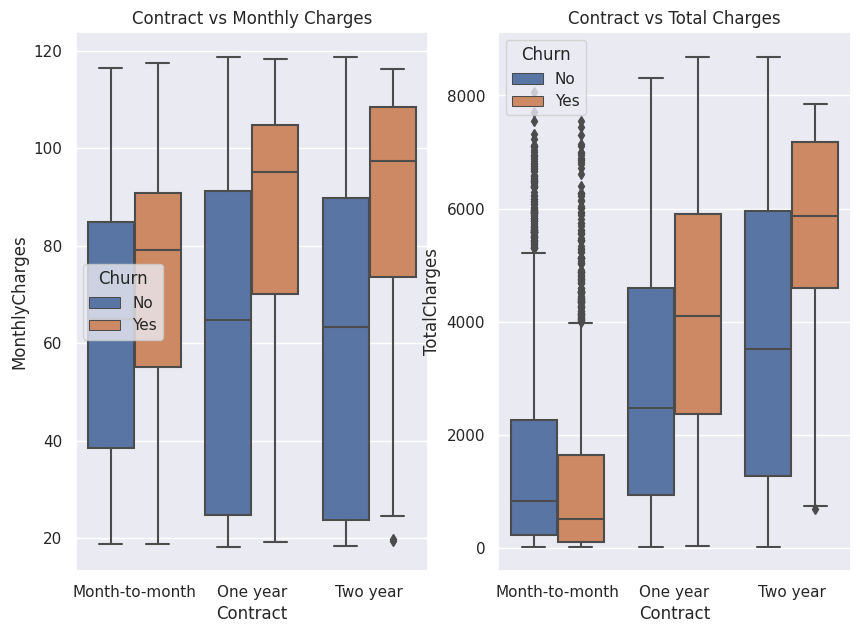

In [106]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10, 7))


boxplot = sns.boxplot(x='Contract',y='MonthlyCharges', hue='Churn',data=df,ax=ax1)
boxplot.set_title("Contract vs Monthly Charges")

boxplot2 = sns.boxplot(x='Contract',y='TotalCharges',hue='Churn',data=df, ax=ax2)
boxplot2.set_title("Contract vs Total Charges")

plt.show()

Individuals with higher monthly charges appear to favor longer-term contracts.

#### Correlation Matrix

<ipython-input-107-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

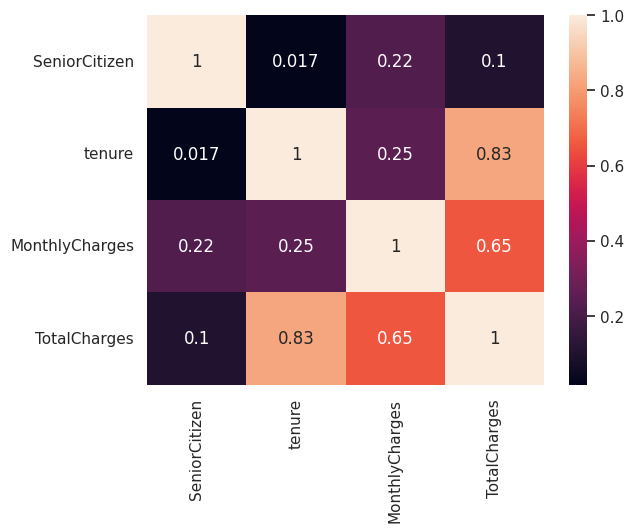

In [107]:
sns.heatmap(df.corr(), annot=True)

# Data Modeling

In [108]:
# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, chi2
# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [109]:
ml_df = df.copy()
ml_df.drop(columns='customerID',inplace=True);

In [110]:
ml_df['Churn'] = ml_df['Churn'].map({'No': 0, 'Yes': 1})

In [111]:
X = ml_df.drop('Churn',axis=1)
y = ml_df['Churn']

In [112]:
categorical_df = ml_df.select_dtypes('object')
categorical_df.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check


In [113]:
categorical_cols = categorical_df.columns.to_list()
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [114]:

numerical_df = ml_df.select_dtypes(['int','float'])
numerical_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [115]:
numerical_cols = numerical_df.columns.to_list()[:-1]
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [116]:
preprocessor = ColumnTransformer(
    transformers = [
        ('one-hot', OneHotEncoder(), categorical_cols),
        ('minmax', StandardScaler(), numerical_cols)
])


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,random_state=45,shuffle=True, stratify=y)

In [118]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



### resample

In [119]:
from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_smote, y_smote = oversample.fit_resample(X_train_transformed, y_train)
# X_train, y_train = X_smote, y_smote

# Identify the minority class
minority_class = y_train.value_counts().idxmin()

# Apply SMOTE only to the minority class
desired_minority_ratio = 4139
smote = SMOTE(sampling_strategy={minority_class: desired_minority_ratio})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)
X_train, y_train = X_train_resampled, y_train_resampled

#### Feature Selection

In [120]:
y_train.value_counts()

1    4139
0    4139
Name: Churn, dtype: int64

In [121]:
class Classifier:

  def __init__(self, X_train, X_test, y_train, y_test):
    pass

  def model(self):
    pass

  def fit(self):
    pass

  def evaluate(self):
    pass

#### Baseline Model
- Logistic Regression

In [122]:
model = LogisticRegression()

In [123]:
logreg = model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
y_pred = logreg.predict(X_test_transformed)
y_proba = logreg.predict_proba(X_test_transformed)[:, 1]

In [125]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f'Accuracy : {accuracy}, \nPrecision: {precision}, \nRecall : {recall}, \nf1 : {f1}, \nroc_auc_score : {roc_auc}')

Accuracy : 0.7473385379701917, 
Precision: 0.5153061224489796, 
Recall : 0.8101604278074866, 
f1 : 0.6299376299376299, 
roc_auc_score : 0.8332532485985172


In [126]:
def evaluate_classification_model(y_true, y_probs, threshold=0.5):
    """
    Evaluate the performance of a binary classification model.

    Parameters:
    - y_true: array-like, true labels (0 or 1)
    - y_probs: array-like, predicted probabilities for class 1
    - threshold: float, threshold for converting probabilities to binary predictions

    Returns:
    - metrics_dict: dictionary containing recall, precision, accuracy, AUC score, and confusion matrix
    - fpr, tpr, thresholds: values for ROC curve plotting
    """

    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_probs > threshold).astype(int)

    # Calculate metrics
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_probs)


    # Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend()
    print("----------------------------------ROC CURVE---------------------------------------")
    print("\n")
    plt.show()
    print("\n")

    # Store metrics in a dictionary
    metrics_dict = {
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy,
        'AUC Score': auc_score,
        'F1_score': f1,
        'Confusion Matrix': cm
    }
    print("\n")
    print("-----------------------------CONFUSION MATRIX----------------------------------")
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.show()
    print("\n")
    print("-----------------------------CLASSIFICATION REPORT----------------------------------")
    print( classification_report(y_true, y_pred))
    print("\n")
    print("------------------------------------METRICS----------------------------------------------")
    return metrics_dict

----------------------------------ROC CURVE---------------------------------------




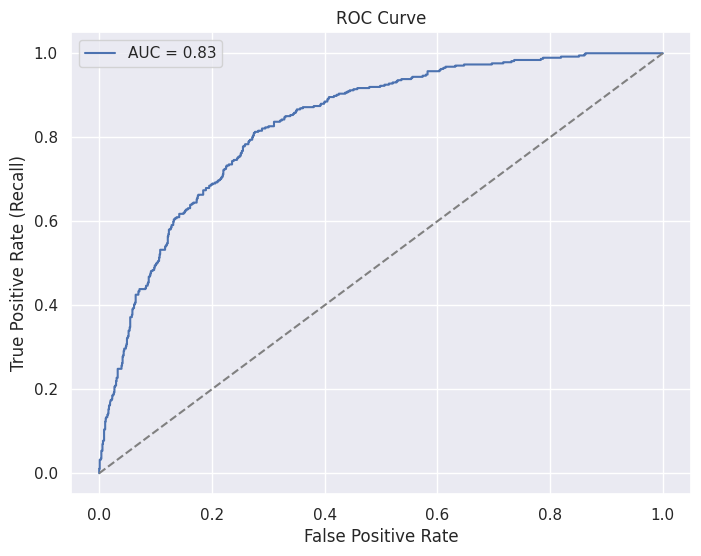





-----------------------------CONFUSION MATRIX----------------------------------


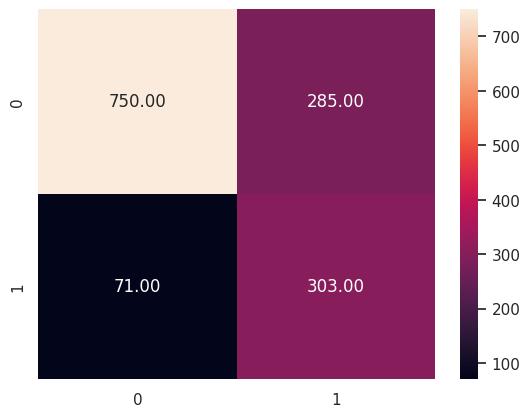



-----------------------------CLASSIFICATION REPORT----------------------------------
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



------------------------------------METRICS----------------------------------------------


{'Recall': 0.8101604278074866,
 'Precision': 0.5153061224489796,
 'Accuracy': 0.7473385379701917,
 'AUC Score': 0.8332532485985172,
 'F1_score': 0.6299376299376299,
 'Confusion Matrix': array([[750, 285],
        [ 71, 303]])}

In [127]:
evaluate_classification_model(y_test,y_proba)

#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test_transformed)
y_proba_dt = dt.predict_proba(X_test_transformed)[:, 1]

decision_tree_evaluation = evaluate_classification_model(y_test,y_proba_dt)

<Axes: >

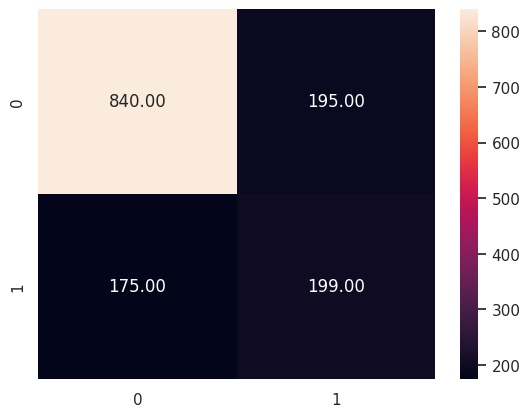

In [129]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True, fmt='.2f')

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



#### Random Forest Classifier

----------------------------------ROC CURVE---------------------------------------




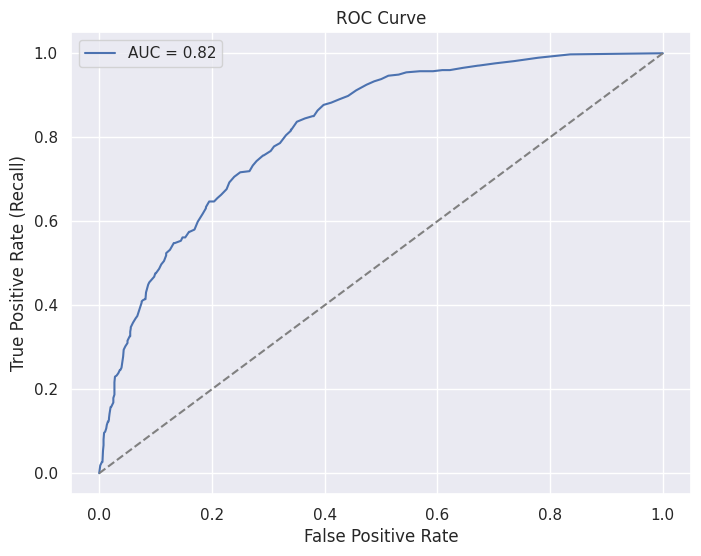





-----------------------------CONFUSION MATRIX----------------------------------


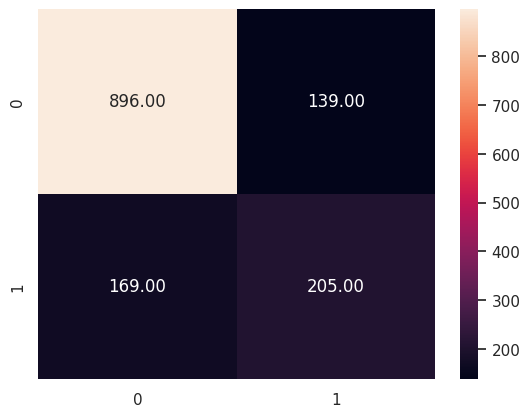



-----------------------------CLASSIFICATION REPORT----------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



------------------------------------METRICS----------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [131]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_transformed)

y_proba_rf = rf_classifier.predict_proba(X_test_transformed)[:, 1]

evaluate_classification_model(y_test,y_proba_rf)

print(classification_report(y_test,y_pred))

- Let's cross-validate our RandomForestClassifier

In [132]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Train the model on the full training set
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test_transformed)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Set Accuracy:", accuracy)

# Additional metrics and detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Cross-Validation Scores: [0.76449275 0.78140097 0.9263285  0.89969789 0.90392749]
Mean Accuracy: 0.8551695199731453
Test Set Accuracy: 0.7814052519517388
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1035
           1       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



#### Grid Search

In [133]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid, X_train, y_train, scoring_metric='accuracy', cv=5):

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring_metric)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Get the best model
    best_model = grid_search.best_estimator_

    return best_model, best_params

In [ ]:
best_model, best_params = perform_grid_search(rf_classifier,{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},X_train,y_train)